# Playing with luck.

# 1. 
# Libraries


In [ ]:
!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import random
ci = 10000.00
bi = 50000.00


# 2. 
# Getting and processing data
# All tickers Bovespa - 2 years / "Adj Close"
# Bova11.SA - 2 years / "Adj Close"

In [ ]:
tickers_ibov = "ABEV3.SA AZUL4.SA B3SA3.SA BBAS3.SA BBDC3.SA BBDC4.SA BBSE3.SA BPAC11.SA BRAP4.SA BRDT3.SA BRFS3.SA BRKM5.SA BRML3.SA BTOW3.SA CCRO3.SA CIEL3.SA CMIG4.SA COGN3.SA CRFB3.SA CSAN3.SA CSNA3.SA CVCB3.SA CYRE3.SA ECOR3.SA EGIE3.SA ELET3.SA ELET6.SA EMBR3.SA ENBR3.SA EQTL3.SA FLRY3.SA GGBR4.SA GNDI3.SA GOAU4.SA GOLL4.SA HAPV3.SA HGTX3.SA HYPE3.SA IGTA3.SA IRBR3.SA ITSA4.SA ITUB4.SA JBSS3.SA KLBN11.SA LAME4.SA LREN3.SA MGLU3.SA MRFG3.SA MRVE3.SA MULT3.SA NTCO3.SA PCAR4.SA PETR3.SA PETR4.SA QUAL3.SA RADL3.SA RAIL3.SA RENT3.SA SANB11.SA SBSP3.SA SMLS3.SA SULA11.SA SUZB3.SA TAEE11.SA TIMP3.SA TOTS3.SA UGPA3.SA USIM5.SA VALE3.SA VIVT4.SA VVAR3.SA WEGE3.SA YDUQ3.SA"
dados_yahoo = yf.download(tickers=tickers_ibov, period='2y')["Adj Close"]
##BOVA11 2 years / "Adj Close"
ibov = yf.download('BOVA11.SA', period='2y')["Adj Close"]
ibov = ibov / ibov.iloc[0]

[*********************100%***********************]  73 of 73 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
# Dropping null values.
dados_yahoo.dropna(how='all', inplace=True)
dados_yahoo.dropna(axis=1, inplace=True, thresh=246)

In [ ]:
dados_yahoo.tail(1)

,ABEV3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,BBSE3.SA,BPAC11.SA,BRAP4.SA,BRDT3.SA,BRFS3.SA,BRKM5.SA,BRML3.SA,BTOW3.SA,CCRO3.SA,CIEL3.SA,CMIG4.SA,COGN3.SA,CRFB3.SA,CSAN3.SA,CSNA3.SA,CVCB3.SA,CYRE3.SA,ECOR3.SA,EGIE3.SA,ELET3.SA,ELET6.SA,EMBR3.SA,ENBR3.SA,EQTL3.SA,FLRY3.SA,GGBR4.SA,GNDI3.SA,GOAU4.SA,GOLL4.SA,HAPV3.SA,HGTX3.SA,HYPE3.SA,IGTA3.SA,IRBR3.SA,ITSA4.SA,ITUB4.SA,JBSS3.SA,KLBN11.SA,LAME4.SA,LREN3.SA,MGLU3.SA,MRFG3.SA,MRVE3.SA,MULT3.SA,PCAR4.SA,PETR3.SA,PETR4.SA,QUAL3.SA,RADL3.SA,RAIL3.SA,RENT3.SA,SANB11.SA,SBSP3.SA,SMLS3.SA,SULA11.SA,SUZB3.SA,TAEE11.SA,TIMP3.SA,TOTS3.SA,UGPA3.SA,USIM5.SA,VALE3.SA,VIVT4.SA,VVAR3.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-08-05,13.18,20.16,63.5,33.330002,20.139999,21.82,28.209999,88.199997,44.240002,22.17,20.66,23.4,10.18,121.5,14.24,5.06,10.97,7.38,21.4,87.910004,13.12,19.85,26.23,14.08,45.369999,36.700001,38.220001,7.66,17.82,25.17,26.200001,18.52,67.989998,8.53,17.629999,65.269997,14.23,35.27,34.98,7.53,10.2,25.67,21.809999,22.889999,34.189999,40.740002,83.0,14.06,18.860001,21.93,NaN,23.75,23.18,28.129999,117.949997,21.889999,51.009998,29.0,58.450001,14.48,50.779999,45.279999,28.370001,14.88,26.0,18.889999,8.5,62.189999,50.189999,20.0,68.199997,32.75


In [ ]:
##Percentage change.
retorno = dados_yahoo.pct_change()
retorno.head(2)

,ABEV3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,BBSE3.SA,BPAC11.SA,BRAP4.SA,BRDT3.SA,BRFS3.SA,BRKM5.SA,BRML3.SA,BTOW3.SA,CCRO3.SA,CIEL3.SA,CMIG4.SA,COGN3.SA,CRFB3.SA,CSAN3.SA,CSNA3.SA,CVCB3.SA,CYRE3.SA,ECOR3.SA,EGIE3.SA,ELET3.SA,ELET6.SA,EMBR3.SA,ENBR3.SA,EQTL3.SA,FLRY3.SA,GGBR4.SA,GNDI3.SA,GOAU4.SA,GOLL4.SA,HAPV3.SA,HGTX3.SA,HYPE3.SA,IGTA3.SA,IRBR3.SA,ITSA4.SA,ITUB4.SA,JBSS3.SA,KLBN11.SA,LAME4.SA,LREN3.SA,MGLU3.SA,MRFG3.SA,MRVE3.SA,MULT3.SA,PCAR4.SA,PETR3.SA,PETR4.SA,QUAL3.SA,RADL3.SA,RAIL3.SA,RENT3.SA,SANB11.SA,SBSP3.SA,SMLS3.SA,SULA11.SA,SUZB3.SA,TAEE11.SA,TIMP3.SA,TOTS3.SA,UGPA3.SA,USIM5.SA,VALE3.SA,VIVT4.SA,VVAR3.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-08-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-08-07,-0.006736,0.003698,-0.029126,-0.021283,-0.021832,-0.015056,-0.012,-0.002564,-0.047319,-0.005484,-0.021842,0.009905,-0.024061,-0.012942,-0.015947,-0.039769,0.005981,-0.05137,-0.007757,0.021666,0.00733,0.010733,-0.013169,-0.017032,-0.026783,-0.045614,-0.026632,0.015566,-0.007143,-0.018333,-0.033748,-0.010089,-0.020408,-0.014175,-0.025766,-0.027008,0.029511,0.005928,-0.029855,0.014794,-0.00184,-0.006025,-0.009956,-0.007147,-0.00595,-0.000642,0.057246,-0.037037,-0.010088,-0.027282,-0.000699,-0.003863,-0.015685,-0.037708,-0.014923,-0.007833,0.0,-0.015894,0.000378,-0.000361,-0.019343,-0.015545,-0.010827,-0.027732,-0.01241,0.026547,-0.011325,0.006679,-0.017975,-0.014778,0.015343,-0.018215


In [ ]:
# Replacing null values in the first line.
retorno_acumulado = (1 + retorno).cumprod()
retorno_acumulado.iloc[0] = 1
retorno_acumulado.head(2)

,ABEV3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,BBSE3.SA,BPAC11.SA,BRAP4.SA,BRDT3.SA,BRFS3.SA,BRKM5.SA,BRML3.SA,BTOW3.SA,CCRO3.SA,CIEL3.SA,CMIG4.SA,COGN3.SA,CRFB3.SA,CSAN3.SA,CSNA3.SA,CVCB3.SA,CYRE3.SA,ECOR3.SA,EGIE3.SA,ELET3.SA,ELET6.SA,EMBR3.SA,ENBR3.SA,EQTL3.SA,FLRY3.SA,GGBR4.SA,GNDI3.SA,GOAU4.SA,GOLL4.SA,HAPV3.SA,HGTX3.SA,HYPE3.SA,IGTA3.SA,IRBR3.SA,ITSA4.SA,ITUB4.SA,JBSS3.SA,KLBN11.SA,LAME4.SA,LREN3.SA,MGLU3.SA,MRFG3.SA,MRVE3.SA,MULT3.SA,PCAR4.SA,PETR3.SA,PETR4.SA,QUAL3.SA,RADL3.SA,RAIL3.SA,RENT3.SA,SANB11.SA,SBSP3.SA,SMLS3.SA,SULA11.SA,SUZB3.SA,TAEE11.SA,TIMP3.SA,TOTS3.SA,UGPA3.SA,USIM5.SA,VALE3.SA,VIVT4.SA,VVAR3.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-08-06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2018-08-07,0.993264,1.003698,0.970874,0.978717,0.978168,0.984944,0.988,0.997436,0.952681,0.994516,0.978158,1.009905,0.975939,0.987058,0.984053,0.960231,1.005981,0.94863,0.992243,1.021666,1.00733,1.010733,0.986831,0.982968,0.973217,0.954386,0.973368,1.015566,0.992857,0.981667,0.966252,0.989911,0.979592,0.985825,0.974234,0.972992,1.029511,1.005928,0.970145,1.014794,0.99816,0.993975,0.990044,0.992853,0.99405,0.999358,1.057246,0.962963,0.989912,0.972718,0.999301,0.996137,0.984315,0.962292,0.985077,0.992167,1.0,0.984106,1.000378,0.999639,0.980657,0.984455,0.989173,0.972268,0.98759,1.026547,0.988675,1.006679,0.982025,0.985222,1.015343,0.981785


# 3. 
#    Random stock portfolio.


##First portfolio of random shares
##Five shares with an investment of 10 thousand in each
##Total investment 50 thousand

In [ ]:
carteira1 = random.sample(list(dados_yahoo.columns) , k=5)
carteira1 = ci * retorno_acumulado.loc[: , carteira1]
carteira1['balance'] = carteira1.sum(axis=1).round(2)
carteira1["return"] = carteira1['balance'].pct_change()

##Second portfolio of random shares
##Five shares with an investment of 10 thousand in each
##Total investment 50 thousand

In [ ]:
carteira2 = random.sample(list(dados_yahoo.columns) , k=5)
carteira2 = ci * retorno_acumulado.loc[: , carteira2]
carteira2['balance'] = carteira2.sum(axis=1).round(2)
carteira2["return"] = carteira2['balance'].pct_change()

##Third portfolio of random shares
##Five shares with an investment of 10 thousand in each
##Total investment 50 thousand

In [ ]:
carteira3 = random.sample(list(dados_yahoo.columns) , k=5)
carteira3 = ci * retorno_acumulado.loc[: , carteira3]
carteira3['balance'] = carteira3.sum(axis=1).round(2)
carteira3["return"] = carteira3['balance'].pct_change()

##Fourth portfolio of random shares
##Five shares with an investment of 10 thousand in each
##Total investment 50 thousand

In [ ]:
carteira4 = random.sample(list(dados_yahoo.columns) , k=5)
carteira4 = ci * retorno_acumulado.loc[: , carteira4]
carteira4['balance'] = carteira4.sum(axis=1).round(2)
carteira4["return"] = carteira4['balance'].pct_change()

##Fifth portfolio of random shares
##Five shares with an investment of 10 thousand in each
##Total investment 50 thousand


In [ ]:
carteira5 = random.sample(list(dados_yahoo.columns) , k=5)
carteira5 = ci * retorno_acumulado.loc[: , carteira5]
carteira5['balance'] = carteira5.sum(axis=1).round(2)
carteira5["return"] = carteira5['balance'].pct_change()

# 4. 
# Balance.


##First balance

In [ ]:
print(f'Investiment R$ {ci * 5}')
print(carteira1['balance'].tail(1))
carteira1.tail(3)

Investiment R$ 50000.0
Date
2020-08-05    95681.02
Name: balance, dtype: float64


,RENT3.SA,SULA11.SA,IRBR3.SA,B3SA3.SA,LAME4.SA,balance,return
Date,,,,,,,
2020-08-03,21224.054984,23601.392953,4264.387386,27314.161341,19000.301598,95404.30,-0.004738
2020-08-04,21059.462255,23643.833093,4209.005783,27027.724680,18840.077551,94780.10,-0.006543
2020-08-05,21527.917864,23945.628844,4170.238793,27147.429358,18889.802183,95681.02,0.009505


##Second balance

In [ ]:
print(f'Investiment R$ {ci * 5}')
print(carteira2['balance'].tail(1))
carteira2.tail(3)

Investiment R$ 50000.0
Date
2020-08-05    99869.7
Name: balance, dtype: float64


,HAPV3.SA,RAIL3.SA,HGTX3.SA,WEGE3.SA,YDUQ3.SA,balance,return
Date,,,,,,,
2020-08-03,23892.353093,14392.950180,10211.961384,37494.378290,13543.214252,99534.86,-0.008827
2020-08-04,23507.644279,14079.634546,9963.236216,37618.290098,13129.895907,98298.70,-0.012419
2020-08-05,23914.335655,14288.511636,10112.470910,38412.445496,13141.933830,99869.70,0.015982


##Third balance

In [ ]:
print(f'Investiment R$ {ci * 5}')
print(carteira3['balance'].tail(1))
carteira3.tail(3)

Investiment R$ 50000.0
Date
2020-08-05    104427.62
Name: balance, dtype: float64


,SUZB3.SA,IGTA3.SA,MGLU3.SA,ITSA4.SA,CSAN3.SA,balance,return
Date,,,,,,,
2020-08-03,10217.240800,10011.805755,48580.666222,11031.941981,23690.704041,103532.36,0.005505
2020-08-04,9977.756093,9908.024793,48539.481388,10526.741127,23187.333054,102139.34,-0.013455
2020-08-05,10736.520059,10677.224661,48833.660063,10516.430665,23663.786256,104427.62,0.022404


##Fourth balance

In [ ]:
print(f'Investiment R$ {ci * 5}')
print(carteira4['balance'].tail(1))
carteira4.tail(3)

Investiment R$ 50000.0
Date
2020-08-05    129010.19
Name: balance, dtype: float64


,CSAN3.SA,CSNA3.SA,B3SA3.SA,ELET6.SA,WEGE3.SA,balance,return
Date,,,,,,,
2020-08-03,23690.704041,16429.143852,27314.161341,23401.388936,37494.378290,128329.78,0.000871
2020-08-04,23187.333054,16101.065434,27027.724680,23273.745553,37618.290098,127208.16,-0.008740
2020-08-05,23663.786256,16555.327026,27147.429358,23231.197759,38412.445496,129010.19,0.014166


##Fifth balance

In [ ]:
print(f'Investiment R$ {ci * 5}')
print(carteira5['balance'].tail(1))
carteira5.tail(3)

Investiment R$ 50000.0
Date
2020-08-05    58155.06
Name: balance, dtype: float64


,BRKM5.SA,CVCB3.SA,GOAU4.SA,RADL3.SA,EQTL3.SA,balance,return
Date,,,,,,,
2020-08-03,4633.667851,4550.658020,10891.456226,15758.615570,21937.692646,57772.09,-0.016147
2020-08-04,4488.492935,4304.922505,10904.952763,15751.964728,21461.725945,56912.06,-0.014887
2020-08-05,4653.554914,4516.528172,11512.282802,15690.770494,21781.921786,58155.06,0.021841


##BOVA11
##Total investment 50 thousand

##BOVA11 - Index.

In [ ]:
ibov.tail(2)

Date
2020-08-04    1.248722
2020-08-05    1.265210
Name: Adj Close, dtype: float64

##BOVA11 balance

In [ ]:
print(f"Investiment R$ {bi}")
print(bi * ibov.tail(1).round(2))
ibov.tail(3)


Investiment R$ 50000.0
Date
2020-08-05    63500.0
Name: Adj Close, dtype: float64


Date
2020-08-03    1.268788
2020-08-04    1.248722
2020-08-05    1.265210
Name: Adj Close, dtype: float64

##Balance chart

##First balance chart - BOVA11 Black line

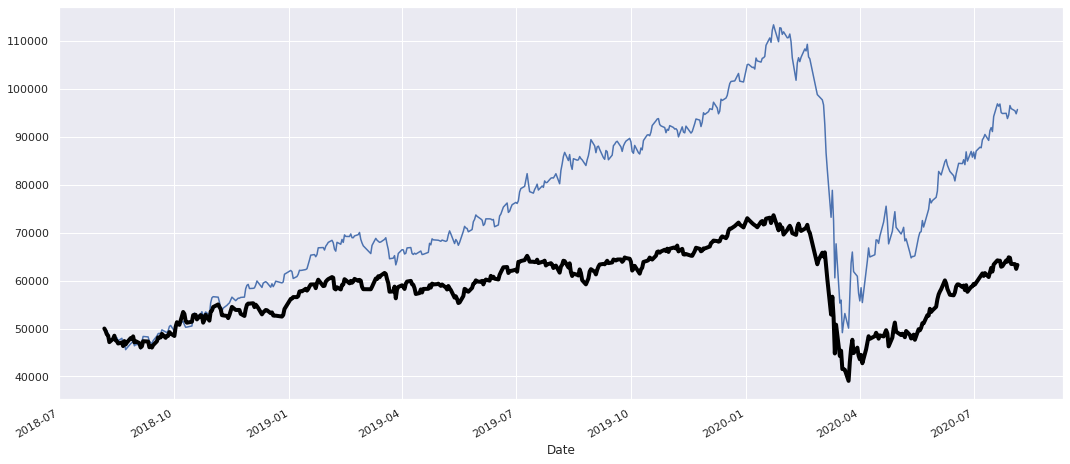

In [ ]:
carteira1['balance'].plot(figsize=(18,8))
(ibov*bi).plot(linewidth=4, color='black')

##Second balance chart - BOVA11 Black line

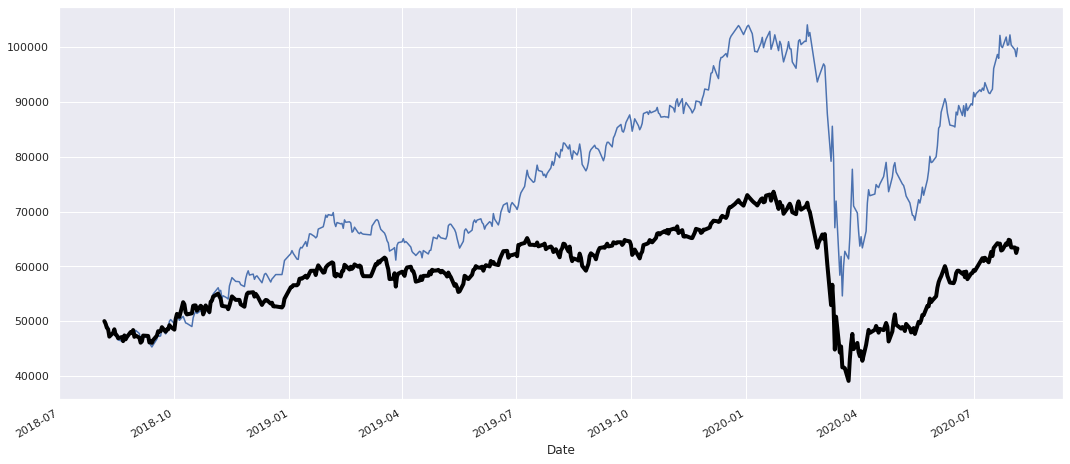

In [ ]:
carteira2['balance'].plot(figsize=(18,8))
(ibov*bi).plot(linewidth=4, color='black')

##Third balance chart - BOVA11 Black line

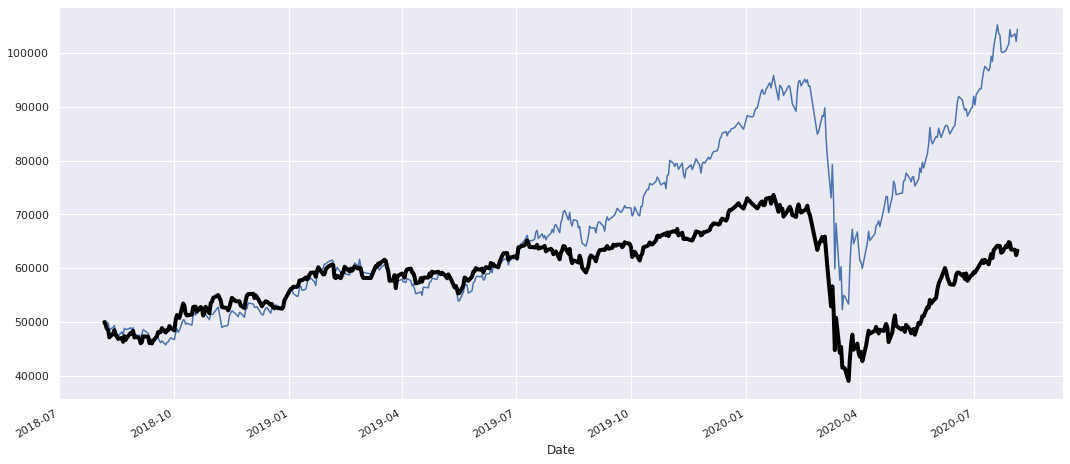

In [ ]:
carteira3['balance'].plot(figsize=(18,8))
(ibov*bi).plot(linewidth=4, color='black')

##Fourth balance chart - BOVA11 Black line

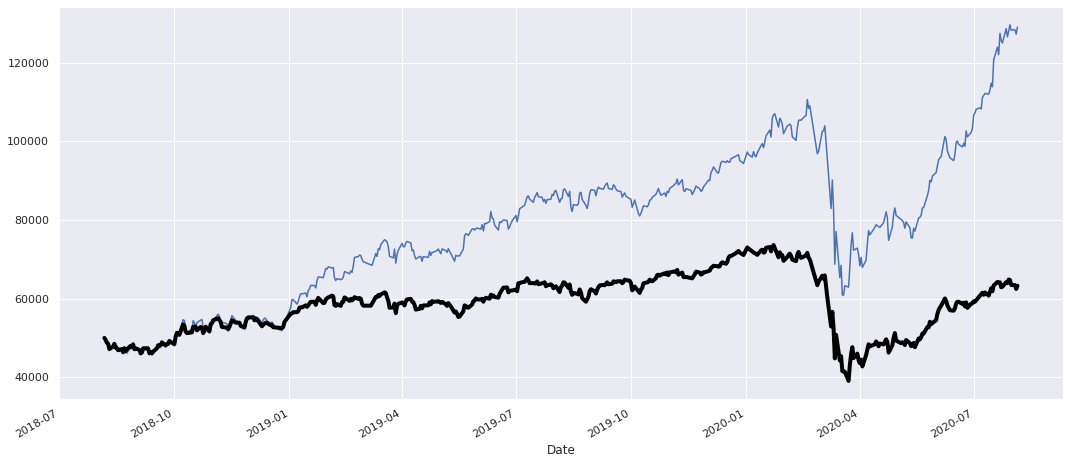

In [ ]:
carteira4['balance'].plot(figsize=(18,8))
(ibov*bi).plot(linewidth=4, color='black')

##Fifth balance chart - BOVA11 Black line

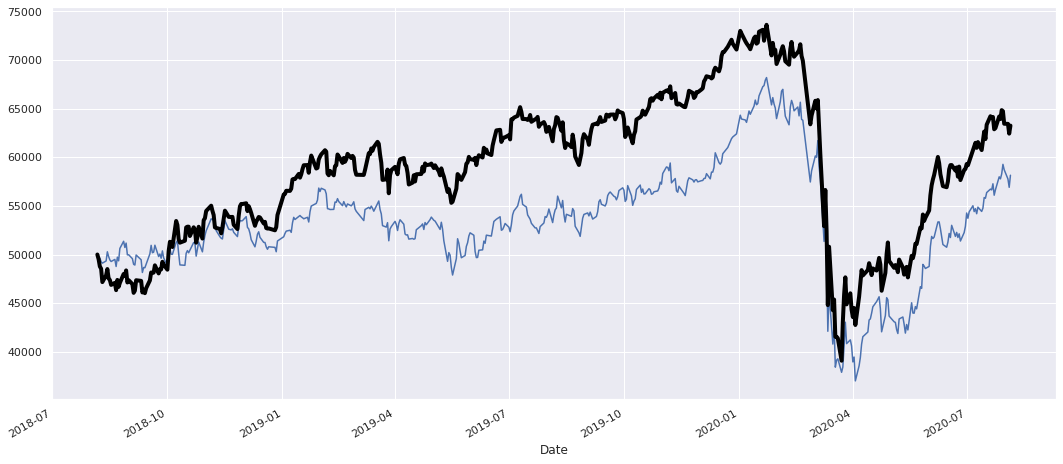

In [ ]:
carteira5['balance'].plot(figsize=(18,8))
(ibov*bi).plot(linewidth=4, color='black')

##All balance chart

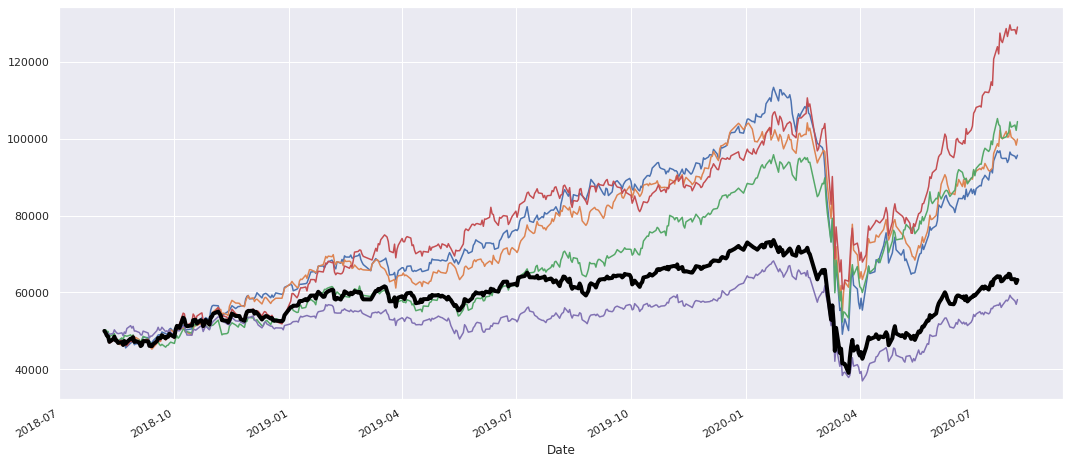

In [ ]:
carteira1['balance'].plot(figsize=(18,8))
carteira2['balance'].plot(figsize=(18,8))
carteira3['balance'].plot(figsize=(18,8))
carteira4['balance'].plot(figsize=(18,8))
carteira5['balance'].plot(figsize=(18,8))
(ibov*bi).plot(linewidth=4, color='black')

###This just kidding can lead you to think that everyone earns money on the stock exchange, but that's a mistake.
